In [52]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#scipy
import scipy as sp

#scikit-learn
import sklearn as sk

# import other important functions and algorithms
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import svm
import seaborn as sns

In [53]:
df_key_stats_2023 = pd.read_csv("FPL_data_2022_23.csv")
df_key_stats_2023.keys()

Index(['first_name', 'second_name', 'goals_scored', 'assists', 'total_points',
       'minutes', 'goals_conceded', 'creativity', 'influence', 'threat',
       'bonus', 'bps', 'ict_index', 'clean_sheets', 'red_cards',
       'yellow_cards', 'selected_by_percent', 'now_cost', 'element_type'],
      dtype='object')

In [54]:
df_key_stats_2023

,first_name,second_name,goals_scored,assists,total_points,minutes,goals_conceded,creativity,influence,threat,bonus,bps,ict_index,clean_sheets,red_cards,yellow_cards,selected_by_percent,now_cost,element_type
0,Granit,Xhaka,7,8,153,2992,35,673.3,647.0,498.0,15,634,182.0,13,0,4,2.7,48,MID
1,Mohamed,Elneny,0,0,6,111,2,5.4,4.6,0.0,0,27,1.1,0,0,0,0.6,41,MID
2,Rob,Holding,1,0,21,562,13,10.3,152.0,54.0,0,120,21.6,0,0,0,0.2,42,DEF
3,Thomas,Partey,3,0,86,2480,28,439.6,513.2,240.0,6,468,119.5,11,0,5,0.4,47,MID
4,Martin,Ødegaard,15,8,212,3132,38,1100.4,960.0,920.0,30,813,298.3,13,0,4,33.3,69,MID
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
773,Matheus,Santos Carneiro Da Cunha,2,0,39,961,12,95.1,143.0,217.0,6,122,45.1,5,0,1,0.1,53,FWD
774,Mario,Lemina,0,1,35,1297,28,65.0,200.4,36.0,0,196,30.1,5,1,2,0.0,45,MID
775,Pablo,Sarabia,1,0,27,764,9,184.7,92.0,157.0,3,57,43.0,3,0,3,0.1,49,MID
776,Daniel,Bentley,0,0,6,180,3,0.0,70.2,0.0,0,45,7.0,0,0,0,0.0,40,GK


In [55]:
df_key_stats_2023.rename(columns={'element_type': 'Pos'}, inplace=True)

In [56]:
df_key_stats_2023

,first_name,second_name,goals_scored,assists,total_points,minutes,goals_conceded,creativity,influence,threat,bonus,bps,ict_index,clean_sheets,red_cards,yellow_cards,selected_by_percent,now_cost,Pos
0,Granit,Xhaka,7,8,153,2992,35,673.3,647.0,498.0,15,634,182.0,13,0,4,2.7,48,MID
1,Mohamed,Elneny,0,0,6,111,2,5.4,4.6,0.0,0,27,1.1,0,0,0,0.6,41,MID
2,Rob,Holding,1,0,21,562,13,10.3,152.0,54.0,0,120,21.6,0,0,0,0.2,42,DEF
3,Thomas,Partey,3,0,86,2480,28,439.6,513.2,240.0,6,468,119.5,11,0,5,0.4,47,MID
4,Martin,Ødegaard,15,8,212,3132,38,1100.4,960.0,920.0,30,813,298.3,13,0,4,33.3,69,MID
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
773,Matheus,Santos Carneiro Da Cunha,2,0,39,961,12,95.1,143.0,217.0,6,122,45.1,5,0,1,0.1,53,FWD
774,Mario,Lemina,0,1,35,1297,28,65.0,200.4,36.0,0,196,30.1,5,1,2,0.0,45,MID
775,Pablo,Sarabia,1,0,27,764,9,184.7,92.0,157.0,3,57,43.0,3,0,3,0.1,49,MID
776,Daniel,Bentley,0,0,6,180,3,0.0,70.2,0.0,0,45,7.0,0,0,0,0.0,40,GK


In [57]:
df_key_stats_2023.isnull().sum()

first_name             0
second_name            0
goals_scored           0
assists                0
total_points           0
minutes                0
goals_conceded         0
creativity             0
influence              0
threat                 0
bonus                  0
bps                    0
ict_index              0
clean_sheets           0
red_cards              0
yellow_cards           0
selected_by_percent    0
now_cost               0
Pos                    0
dtype: int64

In [58]:
dataTypeDict = dict(df_key_stats_2023.dtypes)
print(dataTypeDict)

{'first_name': dtype('O'), 'second_name': dtype('O'), 'goals_scored': dtype('int64'), 'assists': dtype('int64'), 'total_points': dtype('int64'), 'minutes': dtype('int64'), 'goals_conceded': dtype('int64'), 'creativity': dtype('float64'), 'influence': dtype('float64'), 'threat': dtype('float64'), 'bonus': dtype('int64'), 'bps': dtype('int64'), 'ict_index': dtype('float64'), 'clean_sheets': dtype('int64'), 'red_cards': dtype('int64'), 'yellow_cards': dtype('int64'), 'selected_by_percent': dtype('float64'), 'now_cost': dtype('int64'), 'Pos': dtype('O')}


In [59]:
df_key_stats_2023.describe()

,goals_scored,assists,total_points,minutes,goals_conceded,creativity,influence,threat,bonus,bps,ict_index,clean_sheets,red_cards,yellow_cards,selected_by_percent,now_cost
count,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000
mean,1.334190,1.191517,40.776350,962.871465,15.326478,137.515039,205.808997,141.935733,3.132391,176.271208,48.498458,2.970437,0.038560,1.759640,1.923907,48.318766
std,3.158024,2.327294,48.517681,1065.189209,17.004242,227.855722,253.458057,247.164431,5.569424,208.842794,64.572635,3.901015,0.199237,2.434748,5.769127,10.831870
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,43.000000
50%,0.000000,0.000000,23.000000,557.500000,10.000000,37.450000,92.200000,33.500000,0.000000,89.500000,24.600000,1.000000,0.000000,1.000000,0.200000,45.000000
75%,1.000000,1.000000,69.000000,1795.500000,28.000000,177.675000,360.050000,176.250000,5.000000,308.750000,74.900000,5.000000,0.000000,3.000000,0.900000,50.000000
max,36.000000,18.000000,272.000000,3420.000000,74.000000,1818.500000,1390.000000,1825.000000,48.000000,1040.000000,371.000000,18.000000,2.000000,14.000000,78.400000,131.000000


In [60]:
print(df_key_stats_2023.groupby('Pos').size())

Pos
DEF    262
FWD     93
GK      85
MID    338
dtype: int64


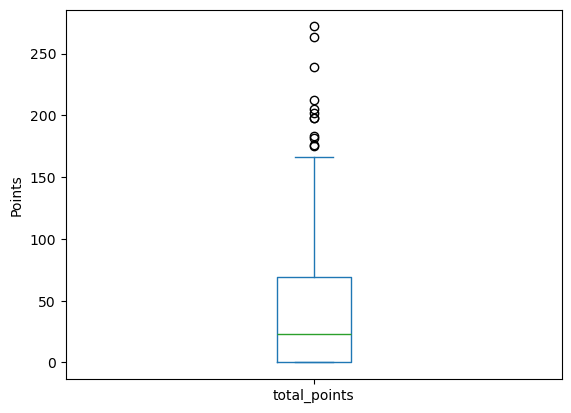

In [61]:
df_key_stats_2023["total_points"].plot(kind = 'box', subplots = False, sharex = False, sharey = False)
plt.ylabel("Points")
plt.show()

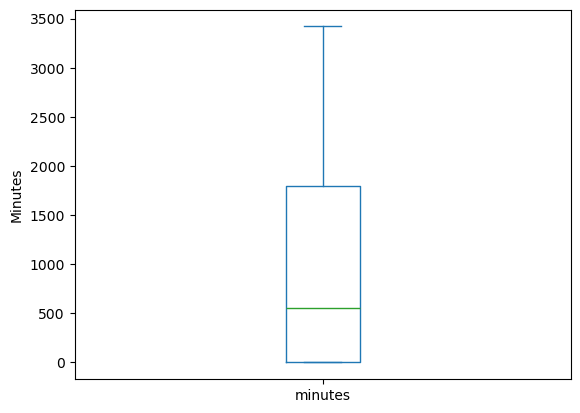

In [62]:
df_key_stats_2023["minutes"].plot(kind = 'box', subplots = False, sharex = False, sharey = False)
plt.ylabel("Minutes")
plt.show()

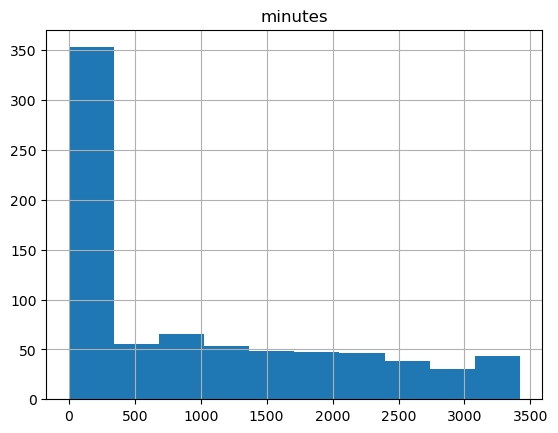

In [63]:
df_key_stats_2023[["minutes"]].hist()
plt.show()

In [64]:
# remove players who did not play even 600 minutes
df_key_stats_2023.sort_values('minutes', inplace=True, ascending=True)
df_key_stats_2023
count = 0

for index, row in df_key_stats_2023.iterrows():
    if (row['minutes']<600):
        count += 1
        continue
    else:
        break
print(count)        

395


In [65]:
df_key_stats_2023 = df_key_stats_2023[395:]

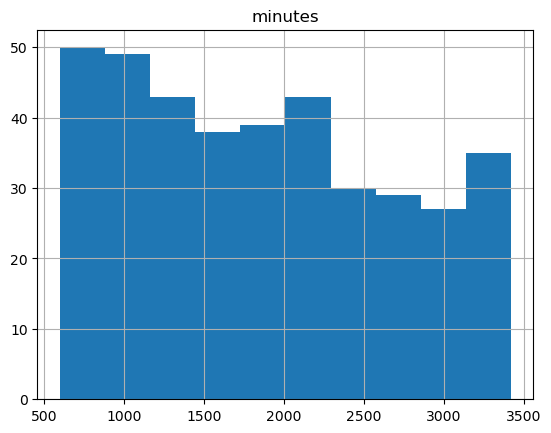

In [66]:
df_key_stats_2023[["minutes"]].hist()
plt.show()

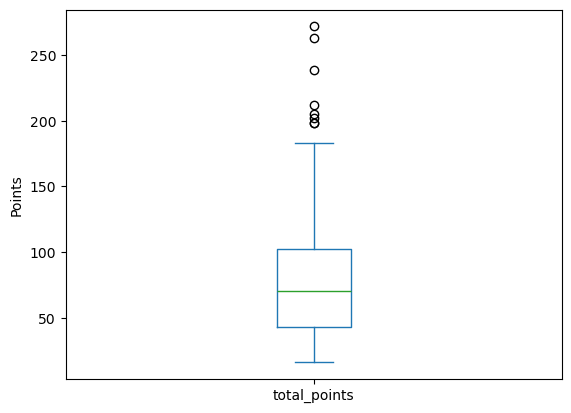

In [67]:
#box plot check again
df_key_stats_2023["total_points"].plot(kind = 'box', subplots = False, sharex = False, sharey = False)
plt.ylabel("Points")
plt.show()

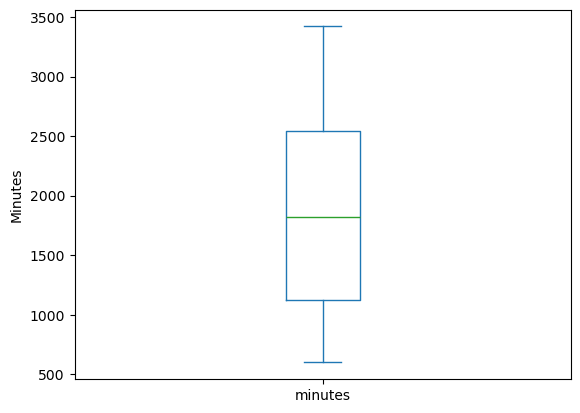

In [68]:
df_key_stats_2023["minutes"].plot(kind = 'box', subplots = False, sharex = False, sharey = False)
plt.ylabel("Minutes")
plt.show()

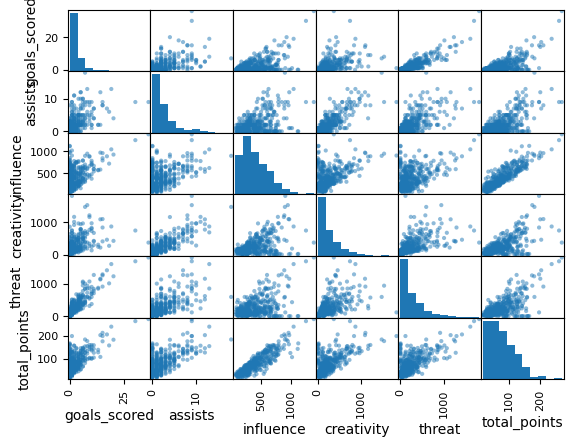

In [69]:
#scatter matrix
scatter_matrix(df_key_stats_2023[['goals_scored','assists','influence','creativity','threat','total_points']])
plt.xticks(rotation = 90)
plt.show()

In [70]:
X = df_key_stats_2023.drop(['first_name','second_name','now_cost','Pos'], axis = 'columns')
y = df_key_stats_2023.Pos   
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [71]:
#Algorithms
all_models = []

#liblinear has both L1, L2 regularization
# - Ridge Regression and Lasso Regression -> avoid overfitting and feature selection
# ovr means it's a binary problem for each label (one vs rest)
all_models.append(("LogReg", LogisticRegression(solver = "liblinear", multi_class = "ovr")))

#maximizes separation using our chosen features
# - maximizing distance between means and minimizing variance
# - reduces features down
# - minimizes the scatter

all_models.append(("LDA", LinearDiscriminantAnalysis()))

# classification algorithm that memorizes observations to classify new data
#  - new data is classified by observing the "nearest neighbour"
all_models.append(("KNN", KNeighborsClassifier()))

# tree-like diagram where each leaf node is the outcome that is used to classify new data
all_models.append(("CART", DecisionTreeClassifier()))

#uses the Gaussian distribution to classify new data
all_models.append(("NB", GaussianNB()))

# uses a threshold that is the midpoint between classifications
all_models.append(("SVM-g", SVC(gamma = "auto")))

# evaluate each model
results = []
names = []
# go through each model and perform cross validation to compare different machine learning algorithms
#  - kind of like foiling through the n-splits and training and testing for each algorithm
for name, model in all_models:
    kfold = StratifiedKFold(n_splits= 10, random_state = 1, shuffle = True)
    cv_results = cross_val_score(model, X_train, y_train, cv = kfold, scoring="accuracy") #evaluate score using cross validation score
    results.append(cv_results)
    names.append(name)
    print("%s:%f(%f)"%(name, cv_results.mean(), cv_results.std())) # take the mean and standard deviation






LogReg:0.859570(0.053180)
LDA:0.836559(0.052486)
KNN:0.670215(0.094280)
CART:0.679570(0.086165)
NB:0.620323(0.090569)
SVM-g:0.431398(0.011885)


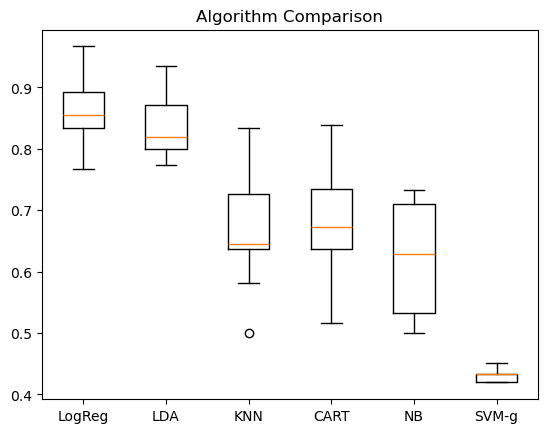

In [72]:
# compare algorithms
plt.boxplot(results, labels = names)
plt.title("Algorithm Comparison")
plt.show()
# best algorithm is logistic regression

In [73]:
# best model - Logistic Regression
model = LogisticRegression(solver = 'liblinear', multi_class="ovr", random_state = 1)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [74]:
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.8441558441558441
[[27  0  0  4]
 [ 0  7  0  0]
 [ 0  0  6  0]
 [ 8  0  0 25]]
              precision    recall  f1-score   support

         DEF       0.77      0.87      0.82        31
         FWD       1.00      1.00      1.00         7
          GK       1.00      1.00      1.00         6
         MID       0.86      0.76      0.81        33

    accuracy                           0.84        77
   macro avg       0.91      0.91      0.91        77
weighted avg       0.85      0.84      0.84        77



{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'ovr', 'n_jobs': None, 'penalty': 'l2', 'random_state': 1, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
[-0.38124901  0.09156498 -0.20229796 -0.00114305 -0.00329757 -0.03746905
 -0.05408075 -0.02226298  0.14597934  0.06742259  0.32594994  0.03276878
 -0.09845823  0.04224481 -0.01742203]
     goals_scored  assists  total_points  minutes  goals_conceded  creativity  \
562             0        0            35      600               6       141.9   
136             0        2            29      600               6       144.5   
175             5        2            52      614               9       105.7   
543             0        1            25      622               7       138.9   
387             1        1            34      635              10        66.9   
..            ...      ...           ...      ...    

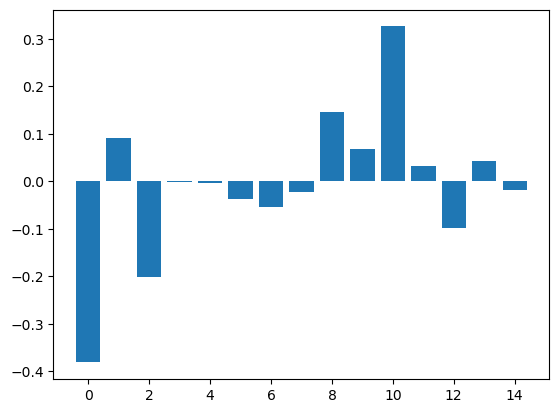

In [76]:
importance = model.coef_[0] # coefficient of the features 
print(model.get_params())
print(importance)
print(df_key_stats_2023.drop(['first_name','second_name','now_cost','Pos'], axis = 'columns'))
# summarize feature importance
for i, v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
#plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [78]:
lda = LinearDiscriminantAnalysis()
lda_model = lda.fit(X_train, y_train)
predictions = lda.predict(X_test)

In [82]:
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.7922077922077922
[[26  0  3  2]
 [ 0  7  0  0]
 [ 1  0  5  0]
 [ 8  2  0 23]]
              precision    recall  f1-score   support

         DEF       0.74      0.84      0.79        31
         FWD       0.78      1.00      0.88         7
          GK       0.62      0.83      0.71         6
         MID       0.92      0.70      0.79        33

    accuracy                           0.79        77
   macro avg       0.77      0.84      0.79        77
weighted avg       0.81      0.79      0.79        77



In [86]:
clf = DecisionTreeClassifier(random_state = 1)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

In [88]:
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.7532467532467533
[[22  1  0  8]
 [ 1  3  0  3]
 [ 1  0  5  0]
 [ 5  0  0 28]]
              precision    recall  f1-score   support

         DEF       0.76      0.71      0.73        31
         FWD       0.75      0.43      0.55         7
          GK       1.00      0.83      0.91         6
         MID       0.72      0.85      0.78        33

    accuracy                           0.75        77
   macro avg       0.81      0.71      0.74        77
weighted avg       0.76      0.75      0.75        77



Number of features selected: 15
Number of importance scores: 15


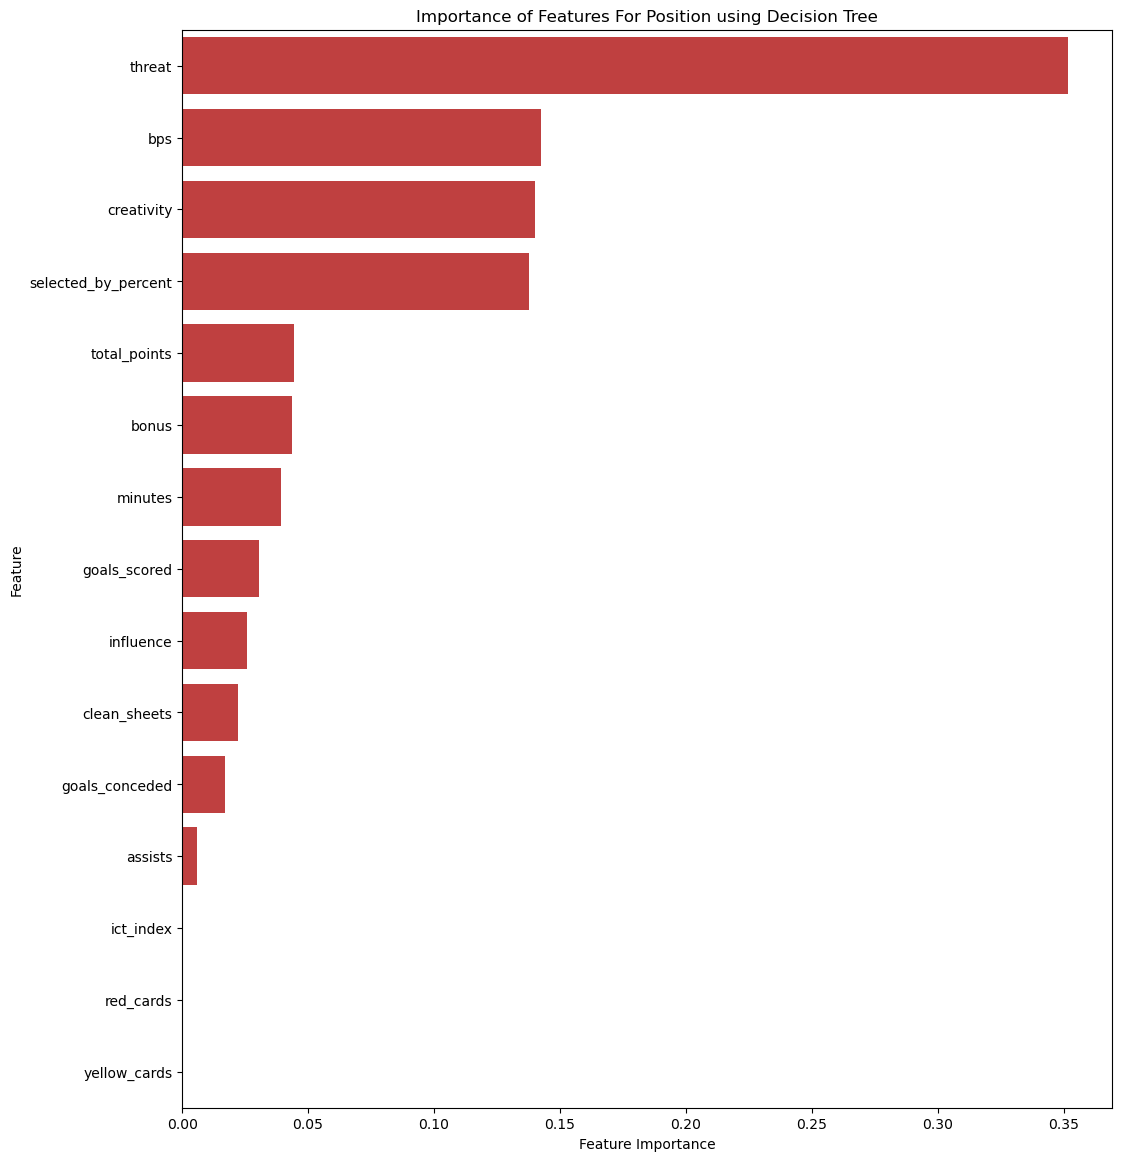

In [98]:
# Check the length of the feature importances array and selected columns
print(f"Number of features selected: {len(df_key_stats_2023.columns[2:17])}")
print(f"Number of importance scores: {len(clf.feature_importances_)}")

# Adjust the slicing if necessary, or correct the feature importance array
important_features = pd.DataFrame({
    'feature': df_key_stats_2023.columns[2:17],  # Make sure this matches the feature importances length
    'importance': np.round(clf.feature_importances_, 4)  # You can round to 4 decimal places or adjust as needed
})

important_features = important_features.sort_values('importance', ascending=False)

# Plot the feature importances
f, ax = plt.subplots(figsize=(12, 14))
g = sns.barplot(x='importance', y='feature', data=important_features, color="red", saturation=0.5)
g.set(xlabel='Feature Importance', ylabel="Feature", title='Importance of Features For Position using Decision Tree')
plt.show()


In [148]:
df_key_stats_2024 = pd.read_csv("FPL_data_2023-24.csv")
df_key_stats_2024

,first_name,second_name,goals_scored,assists,total_points,minutes,goals_conceded,creativity,influence,threat,bonus,bps,ict_index,clean_sheets,red_cards,yellow_cards,selected_by_percent,now_cost,element_type
0,Fábio,Ferreira Vieira,1,3,24,290,2,88.8,82.8,85.0,0,67,25.5,1,1,0,0.1,55,MID
1,Gabriel,Fernando de Jesus,4,7,85,1470,11,403.0,364.8,756.0,10,271,152.7,11,0,6,2.2,70,FWD
2,Gabriel,dos Santos Magalhães,3,1,149,3042,26,121.9,675.8,379.0,8,676,117.9,16,0,4,12.7,60,DEF
3,Kai,Havertz,13,10,180,2627,22,613.4,763.2,1027.0,15,515,240.2,16,0,11,13.0,80,FWD
4,Karl,Hein,0,0,0,0,0,0.0,0.0,0.0,0,0,0.0,0,0,0,0.2,40,GK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,Rodrigo,Martins Gomes,0,0,0,0,0,0.0,0.0,0.0,0,0,0.0,0,0,0,0.2,55,MID
590,Santiago,Bueno,0,0,13,819,18,27.1,173.8,2.0,0,124,20.3,0,0,1,0.1,45,DEF
591,Pablo,Sarabia,4,7,99,1737,27,795.3,469.2,418.0,8,358,168.4,6,0,5,0.3,55,MID
592,Jørgen,Strand Larsen,0,0,0,0,0,0.0,0.0,0.0,0,0,0.0,0,0,0,0.2,55,FWD


In [150]:
df_key_stats_2024.rename(columns={'element_type': 'Pos'}, inplace=True)

In [152]:
df_key_stats_2024.isnull().sum()

first_name             0
second_name            0
goals_scored           0
assists                0
total_points           0
minutes                0
goals_conceded         0
creativity             0
influence              0
threat                 0
bonus                  0
bps                    0
ict_index              0
clean_sheets           0
red_cards              0
yellow_cards           0
selected_by_percent    0
now_cost               0
Pos                    0
dtype: int64

In [154]:
print(df_key_stats_2024.groupby('Pos').size())

Pos
DEF    201
FWD     70
GK      64
MID    259
dtype: int64


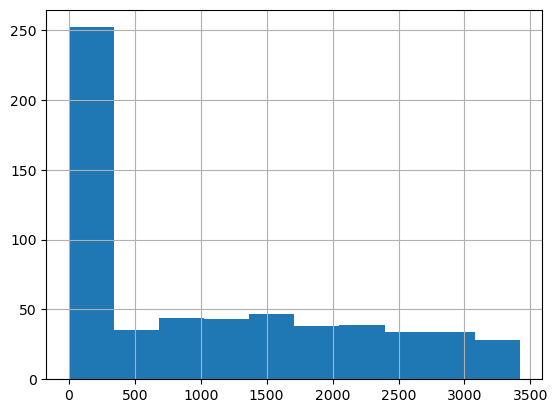

In [156]:
df_key_stats_2024["minutes"].hist()
plt.show()

In [158]:
# remove players who did not play even 600 minutes
df_key_stats_2024.sort_values('minutes', inplace=True, ascending=True)
df_key_stats_2024
count = 0

for index, row in df_key_stats_2024.iterrows():
    if (row['minutes']<600):
        count += 1
        continue
    else:
        break
print(count)        

279


In [160]:
df_key_stats_2024 = df_key_stats_2024[247:]

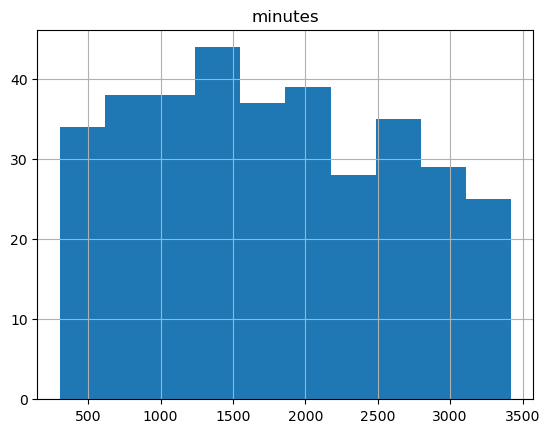

In [162]:
df_key_stats_2024[["minutes"]].hist()
plt.show()

In [146]:
df_key_stats_2024.shape

(347, 19)

In [164]:
df_key_stats_2024.describe()

,goals_scored,assists,total_points,minutes,goals_conceded,creativity,influence,threat,bonus,bps,ict_index,clean_sheets,red_cards,yellow_cards,selected_by_percent,now_cost
count,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000
mean,3.002882,2.682997,76.677233,1771.172911,30.207493,298.210375,431.221326,279.498559,6.242075,338.789625,100.869452,5.043228,0.129683,3.622478,3.925072,53.890490
std,4.231385,3.248445,45.950899,865.590472,15.775801,294.809173,260.002860,304.107187,6.303423,188.242815,71.822817,3.706092,0.353203,2.738900,8.017032,12.440359
min,0.000000,0.000000,1.000000,306.000000,3.000000,0.000000,27.000000,0.000000,0.000000,27.000000,7.100000,0.000000,0.000000,0.000000,0.000000,40.000000
25%,0.000000,0.000000,42.000000,1052.500000,17.500000,93.700000,229.600000,64.500000,2.000000,197.500000,46.550000,2.000000,0.000000,2.000000,0.200000,45.000000
50%,1.000000,2.000000,69.000000,1692.000000,28.000000,206.500000,382.200000,165.000000,4.000000,311.000000,82.700000,5.000000,0.000000,3.000000,0.600000,50.000000
75%,4.000000,4.000000,106.500000,2508.000000,40.000000,395.950000,571.900000,390.000000,9.000000,462.000000,138.150000,7.000000,0.000000,5.000000,3.250000,55.000000
max,27.000000,18.000000,244.000000,3420.000000,79.000000,1674.900000,1240.200000,1581.000000,32.000000,866.000000,375.700000,19.000000,2.000000,13.000000,58.400000,150.000000


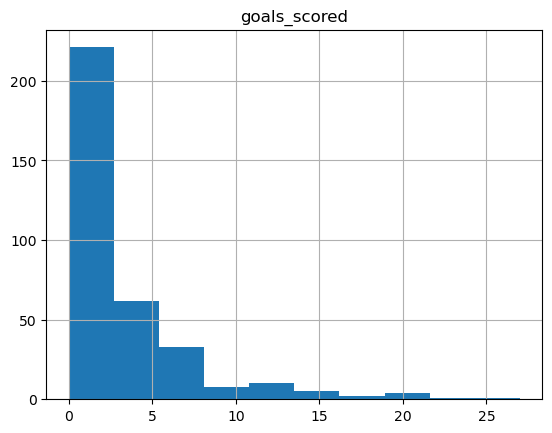

In [166]:
df_key_stats_2024[["goals_scored"]].hist()
plt.show()

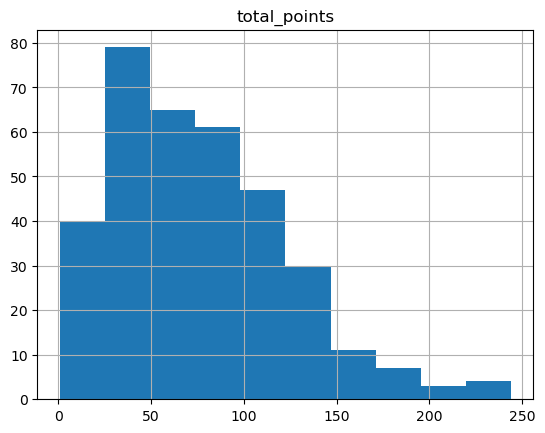

In [168]:
df_key_stats_2024[["total_points"]].hist()
plt.show()

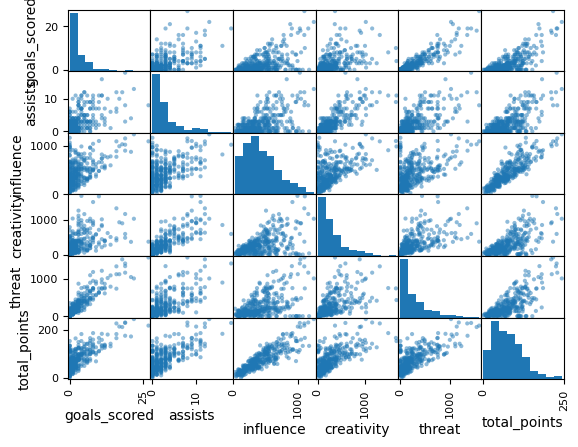

In [170]:
#scatter matrix
scatter_matrix(df_key_stats_2024[['goals_scored','assists','influence','creativity','threat','total_points']])
plt.xticks(rotation = 90)
plt.show()

In [172]:
new_input_X = df_key_stats_2024.drop(['first_name','second_name','now_cost','Pos'], axis = 'columns')
print(new_input_X)
true_pos_y = df_key_stats_2024.Pos
predictions = model.predict(new_input_X)
print(new_input_X)
print(new_input_X, predictions)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

     goals_scored  assists  total_points  minutes  goals_conceded  creativity  \
266             2        0            22      306               5        61.3   
119             0        0             5      307               9        69.6   
66              2        4            40      317               9        58.6   
108             2        2            33      327               5        58.3   
195             0        0            16      332              14        25.2   
..            ...      ...           ...      ...             ...         ...   
17              2        1           164     3420              29       152.1   
530             0        0           112     3420              61         0.0   
397             0        0           133     3420              58        33.2   
546             2        0            82     3420              65       233.1   
241             1        1           117     3420              51       269.6   

     influence  threat  bon

In [174]:
print(accuracy_score(true_pos_y, predictions))
print(confusion_matrix(true_pos_y, predictions))
print(classification_report(true_pos_y, predictions))

0.8559077809798271
[[102   1   0  24]
 [  0  33   0   5]
 [  1   0  31   0]
 [ 14   5   0 131]]
              precision    recall  f1-score   support

         DEF       0.87      0.80      0.84       127
         FWD       0.85      0.87      0.86        38
          GK       1.00      0.97      0.98        32
         MID       0.82      0.87      0.85       150

    accuracy                           0.86       347
   macro avg       0.88      0.88      0.88       347
weighted avg       0.86      0.86      0.86       347



In [176]:
df_key_stats_2024["predicted"] = predictions
df_key_stats_2024 = df_key_stats_2024.sort_values('total_points', inplace=False, ascending=False)
df_key_stats_2024.head(50)

/var/folders/r3/lm3pwby56j5cp3j_1brd5pz00000gn/T/ipykernel_1080/277136219.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_key_stats_2024["predicted"] = predictions


,first_name,second_name,goals_scored,assists,total_points,minutes,goals_conceded,creativity,influence,threat,bonus,bps,ict_index,clean_sheets,red_cards,yellow_cards,selected_by_percent,now_cost,Pos,predicted
184,Cole,Palmer,22,13,244,2617,46,1022.5,1240.2,1016.0,32,844,327.8,7,0,7,40.2,105,MID,MID
361,Phil,Foden,19,8,230,2860,27,1157.8,1154.8,1172.0,31,866,348.8,14,0,2,20.5,95,MID,MID
57,Ollie,Watkins,19,18,228,3222,56,588.5,1024.6,1420.0,29,752,302.8,7,0,4,40.2,90,FWD,FWD
16,Bukayo,Saka,16,12,226,2922,27,1319.8,1093.8,1342.0,29,776,375.7,16,0,4,29.6,100,MID,MID
364,Erling,Haaland,27,8,217,2553,25,367.2,1094.6,1581.0,29,792,303.3,11,0,1,48.7,150,FWD,FWD
525,Son,Heung-min,17,10,213,2934,51,921.9,993.2,1131.0,25,707,304.7,8,0,1,10.3,100,MID,MID
341,Mohamed,Salah,18,12,211,2531,30,892.2,1033.8,1531.0,24,621,346.0,8,0,2,33.9,125,MID,MID
12,Martin,Ødegaard,8,11,186,3098,23,1499.4,910.4,757.0,26,703,317.0,19,0,2,16.4,85,MID,MID
414,Anthony,Gordon,11,16,183,2896,48,843.7,822.6,905.0,14,594,256.7,12,1,10,28.7,75,MID,MID
22,Benjamin,White,4,5,182,2987,26,589.4,765.8,234.0,14,776,159.0,18,0,8,11.2,65,DEF,MID


In [180]:
# Filter the DataFrame where values in col1 are not equal to values in col2
changed_pos = df_key_stats_2024[df_key_stats_2024['Pos'] != df_key_stats_2024['predicted']]

In [183]:
changed_pos

,first_name,second_name,goals_scored,assists,total_points,minutes,goals_conceded,creativity,influence,threat,bonus,bps,ict_index,clean_sheets,red_cards,yellow_cards,selected_by_percent,now_cost,Pos,predicted
22,Benjamin,White,4,5,182,2987,26,589.4,765.8,234.0,14,776,159.0,18,0,8,11.2,65,DEF,MID
3,Kai,Havertz,13,10,180,2627,22,613.4,763.2,1027.0,15,515,240.2,16,0,11,13.0,80,FWD,MID
417,Alexander,Isak,21,4,172,2253,41,362.5,877.4,1054.0,23,645,229.3,7,0,1,58.4,85,FWD,MID
325,Trent,Alexander-Arnold,3,5,122,2153,28,1027.5,601.8,237.0,19,590,186.8,8,0,6,27.6,70,DEF,MID
519,Richarlison,de Andrade,11,4,122,1481,18,208.4,560.6,758.0,7,305,152.1,7,0,3,1.1,70,FWD,MID
434,Kieran,Trippier,1,10,111,2235,43,1028.5,719.0,102.0,20,589,185.2,6,0,5,13.9,60,DEF,MID
79,Antoine,Semenyo,8,4,107,2099,33,411.2,506.8,748.0,14,363,166.8,8,0,6,1.2,55,MID,FWD
131,João Pedro,Junqueira de Jesus,9,3,104,2037,38,578.8,622.4,932.0,12,406,213.4,5,0,2,18.9,55,FWD,MID
80,Marcos,Senesi,4,5,102,2239,44,311.2,735.0,147.0,13,486,119.7,6,0,13,1.1,50,DEF,MID
359,Jérémy,Doku,3,10,98,1585,19,640.2,524.2,875.0,13,391,203.9,1,0,3,3.1,65,MID,DEF
